In [16]:
import pandas as pd
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('AirPassengers.csv', index_col=0)
df.head()
y = df['Passengers']
y_train = y[:-12]
y_test = y[-12:]
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1276.259, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1225.563, Time=0.24 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 3.633

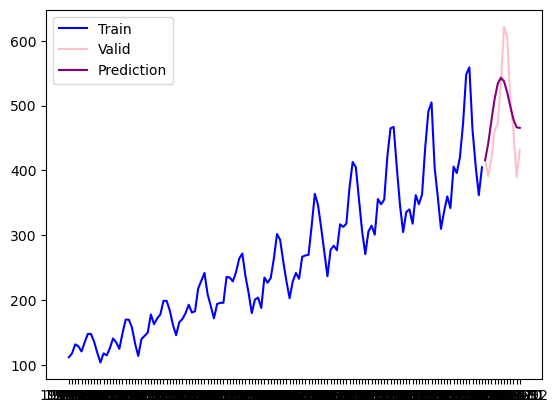

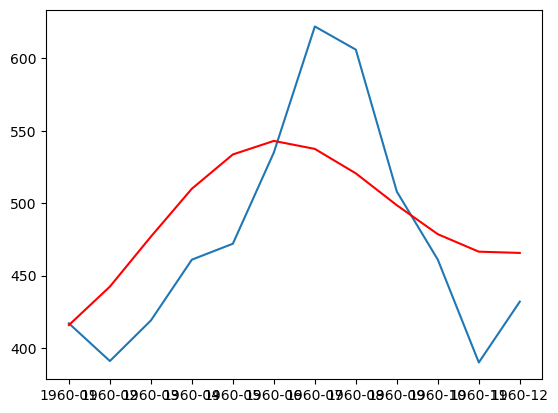

Test RMSE: 53.290


In [18]:
from numpy import sqrt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()


# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

AutoETS

In [19]:
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [20]:
df = pd.read_csv('AirPassengers.csv', index_col=0)
df.head()

idx = pd.to_datetime(df.index).to_period('M')
df.index=idx
y = df['Passengers']

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

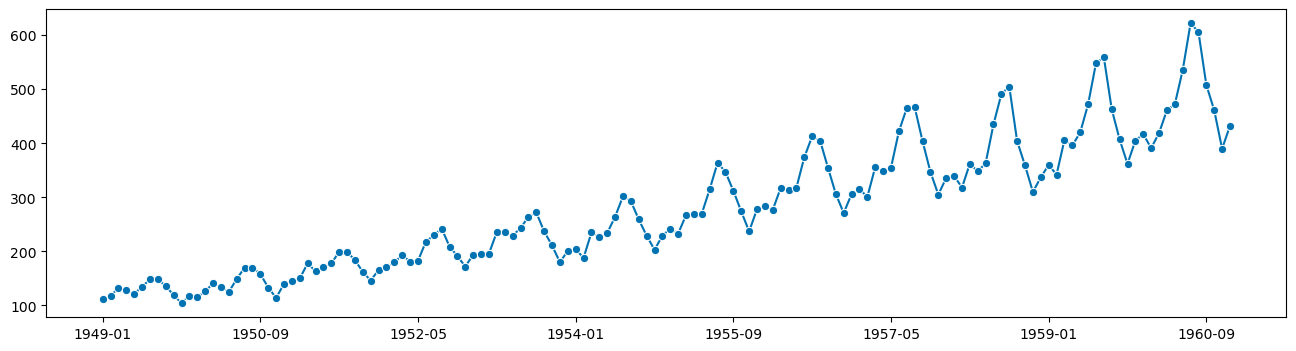

In [21]:
plot_series(df)

In [22]:
y_train, y_test = temporal_train_test_split(y,test_size=12)
print(y_train.shape, y_test.shape)

(132,) (12,)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

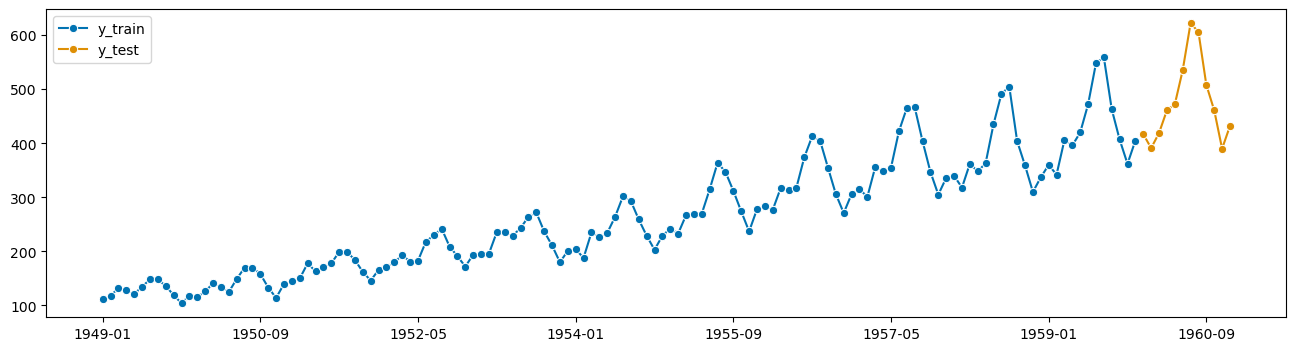

In [23]:
plot_series(y_train, y_test, labels=['y_train', 'y_test'])

In [24]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', is_relative=False)

In [31]:
forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  132
Model:                       ETS(MAM)   Log Likelihood                -469.389
Date:                Fri, 17 Nov 2023   AIC                            974.777
Time:                        09:45:03   BIC                           1026.668
Sample:                    01-31-1949   HQIC                           995.863
                         - 12-31-1959   Scale                            0.001
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.9999      0.083     12.008      0.000       0.837       1.163
smoothing_trend      9.999e-05        nan        nan        nan         nan         nan
smoothing_season

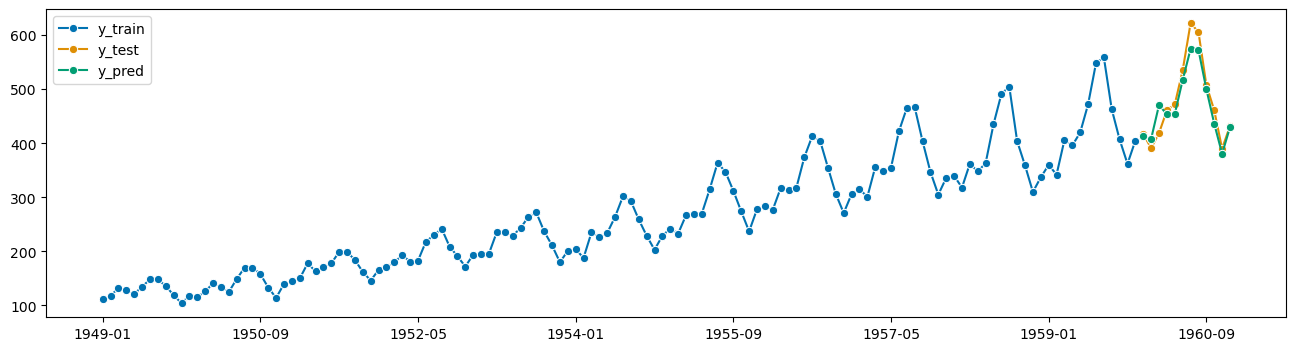

In [32]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

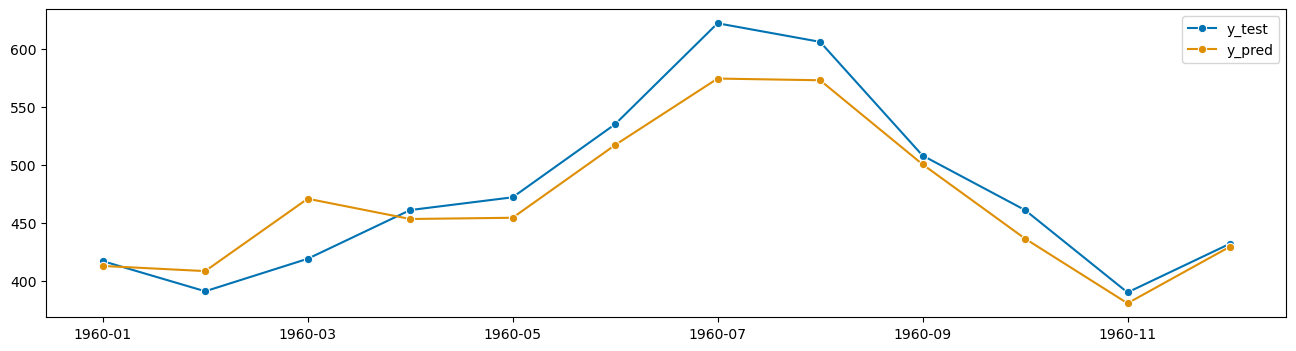

In [33]:
plot_series(y_test, y_pred, labels=['y_test', 'y_pred'])
plt.show()

In [34]:
from sktime.performance_metrics.forecasting import mean_squared_error
mean_squared_error(y_test, y_pred,square_root=True)

25.523492797254274

ExponentialSmoothing

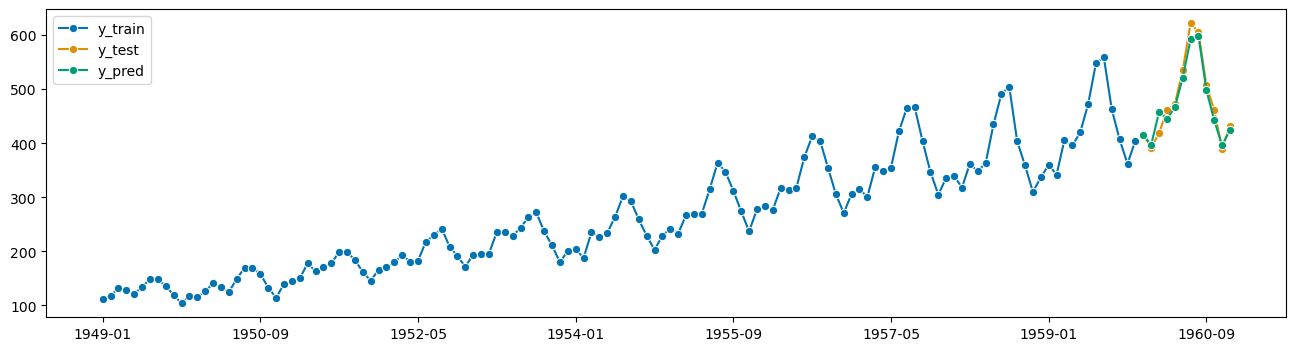

In [35]:
forecaster = ExponentialSmoothing(trend='add', seasonal='additive', sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

In [36]:
from sktime.performance_metrics.forecasting import mean_squared_error
mean_squared_error(y_test, y_pred,square_root=True)

16.97889683889692